##  Hyperparameter Tuning ##

Steps:

1. Import important libraraies.

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

2. Split the dataset into training (80%) and testing (20%) sets.

In [43]:
df = pd.read_csv("../data/heart_disease.csv")

X = df.drop("num", axis=1)
y = df["num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

3. Use GridSearchCV & RandomizedSearchCV to optimize model hyperparameters.

- GridSearchCV for Logistic Regression

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters (GridSearch): {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters (RandomizedSearch): {'solver': 'saga', 'penalty': 'l1', 'C': np.float64(0.3359818286283781)}

--- Original Logistic Regression ---
Accuracy : 0.885
Precision: 0.862
Recall   : 0.893
F1-score : 0.877
AUC Score: 0.961

--- Logistic Regression (Optimized) ---
Accuracy : 0.885
Precision: 0.862
Recall   : 0.893
F1-score : 0.877
AUC Score: 0.956


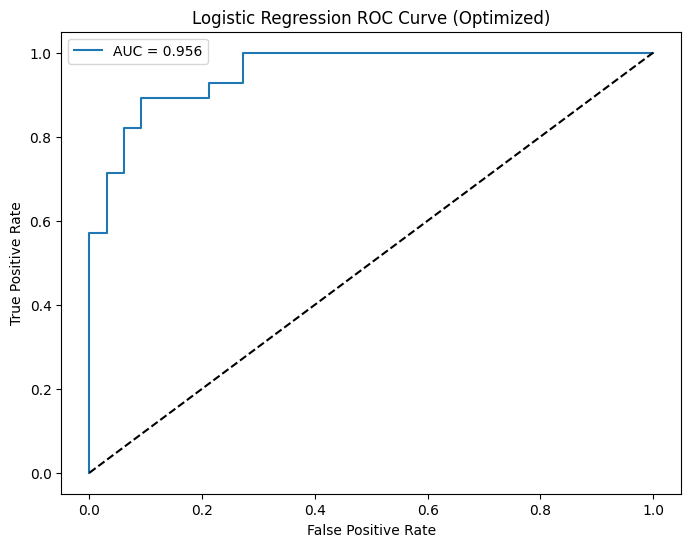

In [44]:
for col in ['cp_4', 'thal_7', 'exang']:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

lr = LogisticRegression(max_iter=1000, random_state=42)

param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

param_dist = {
    "C": np.logspace(-3, 3, 20),
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_lr_grid = grid_search.best_estimator_

print("Best Parameters (GridSearch):", grid_search.best_params_)


random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_dist, n_iter=20, scoring="accuracy", cv=5, n_jobs=-1, random_state=42, verbose=1)
random_search.fit(X_train, y_train)
best_lr_rand = random_search.best_estimator_

print("Best Parameters (RandomizedSearch):", random_search.best_params_)

best_lr = best_lr_grid

y_pred = best_lr.predict(X_test)
y_prob = best_lr.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print("\n--- Original Logistic Regression ---")
print("Accuracy : 0.885")
print("Precision: 0.862")
print("Recall   : 0.893")
print("F1-score : 0.877")
print("AUC Score: 0.961")

print("\n--- Logistic Regression (Optimized) ---")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"AUC Score: {auc_score:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve (Optimized)")
plt.legend()
plt.show()

- RandomizedSearchCV for Logistic Regression

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters (RandomizedSearch): {'solver': 'saga', 'penalty': 'l1', 'C': np.float64(0.3359818286283781)}

--- Original Logistic Regression ---
Accuracy : 0.885
Precision: 0.862
Recall   : 0.893
F1-score : 0.877
AUC Score: 0.961

--- Logistic Regression (Optimized) ---
Accuracy : 0.885
Precision: 0.862
Recall   : 0.893
F1-score : 0.877
AUC Score: 0.958


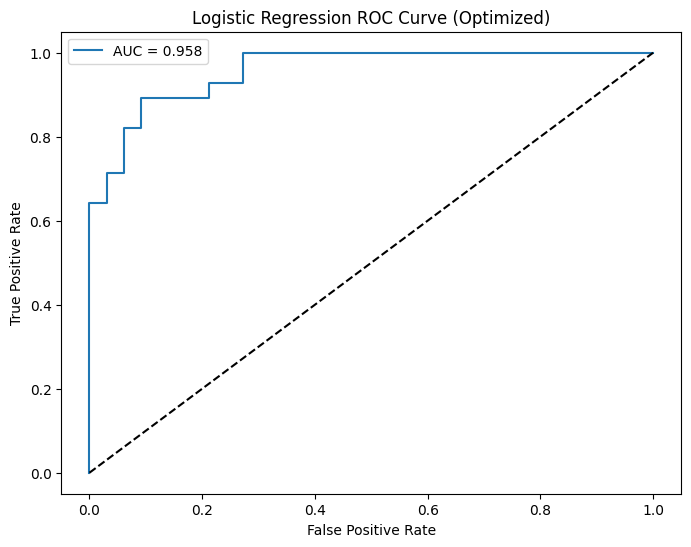

In [45]:
for col in ['cp_4', 'thal_7', 'exang']:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

lr = LogisticRegression(max_iter=1000, random_state=42)

param_dist = {
    "C": np.logspace(-3, 3, 20),
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_dist, n_iter=30, scoring="accuracy", cv=5, n_jobs=-1, random_state=42, verbose=1)

random_search.fit(X_train, y_train)
best_lr = random_search.best_estimator_

print("Best Parameters (RandomizedSearch):", random_search.best_params_)

y_pred = best_lr.predict(X_test)
y_prob = best_lr.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print("\n--- Original Logistic Regression ---")
print("Accuracy : 0.885")
print("Precision: 0.862")
print("Recall   : 0.893")
print("F1-score : 0.877")
print("AUC Score: 0.961")

print("\n--- Logistic Regression (Optimized) ---")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"AUC Score: {auc_score:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve (Optimized)")
plt.legend()
plt.show()

- GridSearchCV for Decision Tree

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Parameters (GridSearch): {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters (RandomizedSearch): {'min_samples_split': np.int64(3), 'min_samples_leaf': np.int64(18), 'max_features': 'log2', 'max_depth': np.int64(15), 'criterion': 'log_loss'}

--- Original Decision Tree (Default) ---
Accuracy : 0.754
Precision: 0.697
Recall   : 0.821
F1-score : 0.754
AUC Score: 0.759

--- Decision Tree (Optimized) ---
Accuracy : 0.754
Precision: 0.842
Recall   : 0.571
F1-score : 0.681
AUC Score: 0.888


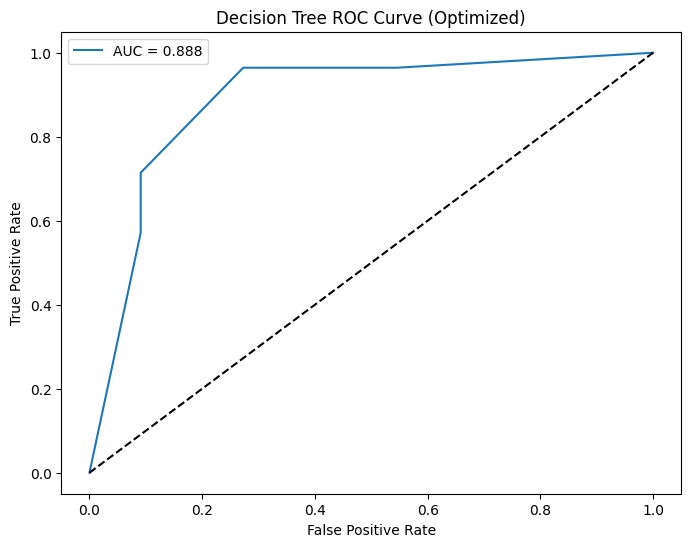

In [46]:
for col in ['cp_4', 'thal_7', 'exang']:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 3, 5, 7, 10, 15],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}

param_dist = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None] + list(np.arange(2, 20)),
    "min_samples_split": np.arange(2, 20),
    "min_samples_leaf": np.arange(1, 20),
    "max_features": [None, "sqrt", "log2"]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_dt_grid = grid_search.best_estimator_
print("Best Parameters (GridSearch):", grid_search.best_params_)

random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=30, scoring="accuracy", cv=5, n_jobs=-1, random_state=42, verbose=1)
random_search.fit(X_train, y_train)
best_dt_rand = random_search.best_estimator_
print("Best Parameters (RandomizedSearch):", random_search.best_params_)

best_dt = best_dt_grid

y_pred = best_dt.predict(X_test)
y_prob = best_dt.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print("\n--- Original Decision Tree (Default) ---")
print("Accuracy : 0.754")
print("Precision: 0.697")
print("Recall   : 0.821")
print("F1-score : 0.754")
print("AUC Score: 0.759")

print("\n--- Decision Tree (Optimized) ---")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"AUC Score: {auc_score:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve (Optimized)")
plt.legend()
plt.show()

- RandomizedSearchCV for Decision Tree

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters (RandomizedSearch): {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5, 'criterion': 'log_loss'}

--- Original Decision Tree ---
Accuracy : 0.754
Precision: 0.697
Recall   : 0.821
F1-score : 0.754
AUC Score: 0.759

--- Decision Tree (Optimized) ---
Accuracy : 0.721
Precision: 0.762
Recall   : 0.571
F1-score : 0.653
AUC Score: 0.846


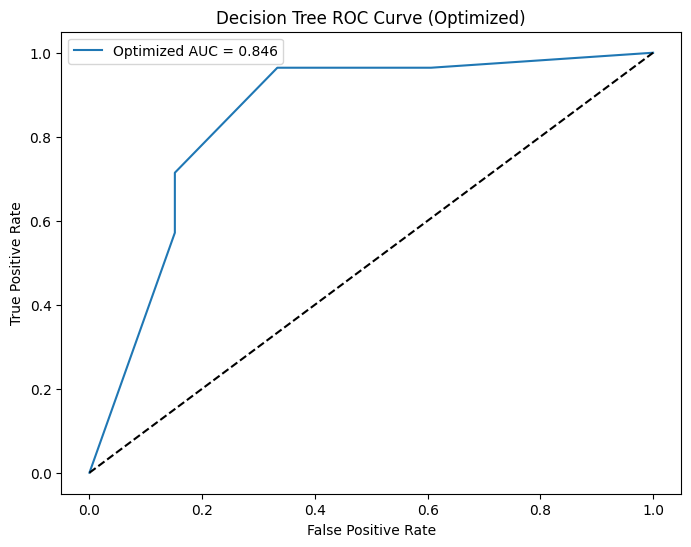

In [47]:
param_dist = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 5, 10, 20, 30, 50],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": [None, "sqrt", "log2"]
}

random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=30, scoring="accuracy", cv=5, n_jobs=-1, random_state=42, verbose=1)

random_search.fit(X_train, y_train)
best_dt = random_search.best_estimator_

print("Best Parameters (RandomizedSearch):", random_search.best_params_)

y_pred_opt = best_dt.predict(X_test)
y_prob_opt = best_dt.predict_proba(X_test)[:, 1]

acc_opt = accuracy_score(y_test, y_pred_opt)
prec_opt = precision_score(y_test, y_pred_opt)
rec_opt = recall_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)
auc_opt = roc_auc_score(y_test, y_prob_opt)

print("\n--- Original Decision Tree ---")
print("Accuracy : 0.754")
print("Precision: 0.697")
print("Recall   : 0.821")
print("F1-score : 0.754")
print("AUC Score: 0.759")

print("\n--- Decision Tree (Optimized) ---")
print(f"Accuracy : {acc_opt:.3f}")
print(f"Precision: {prec_opt:.3f}")
print(f"Recall   : {rec_opt:.3f}")
print(f"F1-score : {f1_opt:.3f}")
print(f"AUC Score: {auc_opt:.3f}")

fpr_opt, tpr_opt, _ = roc_curve(y_test, y_prob_opt)

plt.figure(figsize=(8,6))
plt.plot(fpr_opt, tpr_opt, label=f"Optimized AUC = {auc_opt:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve (Optimized)")
plt.legend()
plt.show()

- GridSearchCV for Random Forest

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters (GridSearch): {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

--- Original Random Forest (Default) ---
Accuracy : 0.869
Precision: 0.833
Recall   : 0.893
F1-score : 0.862
AUC Score: 0.930

--- Random Forest (Optimized) ---
Accuracy : 0.869
Precision: 0.833
Recall   : 0.893
F1-score : 0.862
AUC Score: 0.930


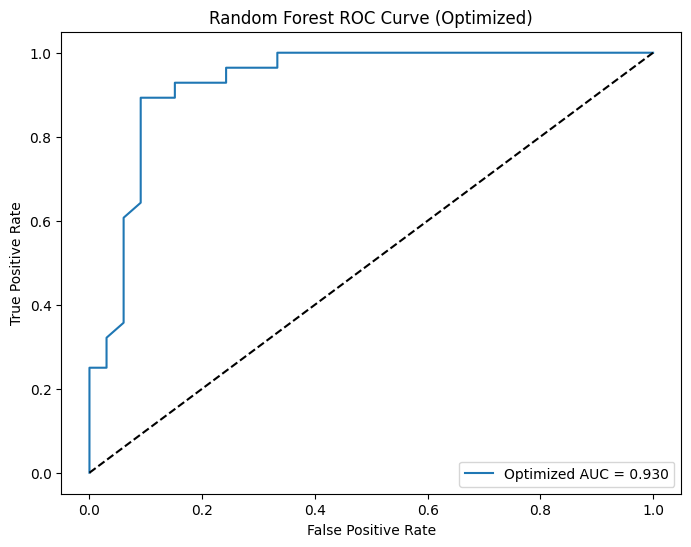

In [48]:
for col in ['cp_4', 'thal_7', 'exang']:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

print("Best Parameters (GridSearch):", grid_search.best_params_)

y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print("\n--- Original Random Forest (Default) ---")
print("Accuracy : 0.869")
print("Precision: 0.833")
print("Recall   : 0.893")
print("F1-score : 0.862")
print("AUC Score: 0.930")

print("\n--- Random Forest (Optimized) ---")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"AUC Score: {auc_score:.3f}")

fpr_opt, tpr_opt, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr_opt, tpr_opt, label=f"Optimized AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve (Optimized)")
plt.legend()
plt.show()

- RandomizedSearchCV for Random Forest

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters (RandomizedSearch): {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'log_loss'}

--- Original Random Forest (Default) ---
Accuracy : 0.869
Precision: 0.833
Recall   : 0.893
F1-score : 0.862
AUC Score: 0.930

--- Random Forest (Optimized) ---
Accuracy : 0.902
Precision: 0.893
Recall   : 0.893
F1-score : 0.893
AUC Score: 0.948


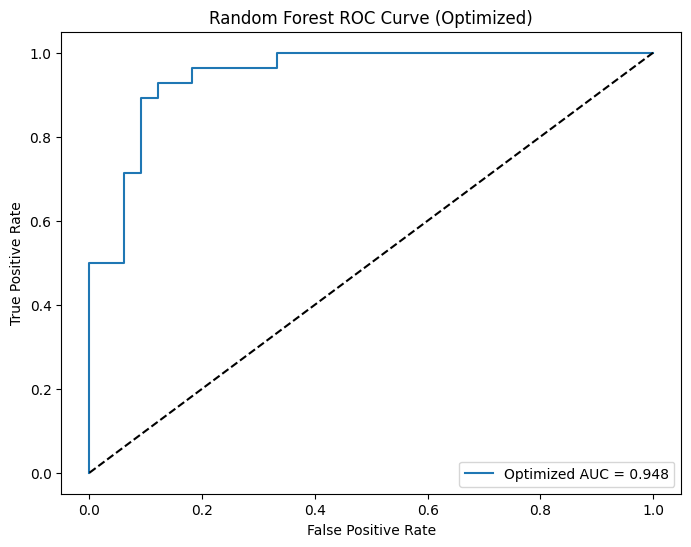

In [49]:
for col in ['cp_4', 'thal_7', 'exang']:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

rf = RandomForestClassifier(random_state=42)

param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 5, 10, 20, 30, 50],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": [None, "sqrt", "log2"]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=30, scoring="accuracy", cv=5, n_jobs=-1, random_state=42, verbose=1)

random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

print("Best Parameters (RandomizedSearch):", random_search.best_params_)

y_pred_opt = best_rf.predict(X_test)
y_prob_opt = best_rf.predict_proba(X_test)[:, 1]

acc_opt = accuracy_score(y_test, y_pred_opt)
prec_opt = precision_score(y_test, y_pred_opt)
rec_opt = recall_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)
auc_opt = roc_auc_score(y_test, y_prob_opt)

print("\n--- Original Random Forest (Default) ---")
print("Accuracy : 0.869")
print("Precision: 0.833")
print("Recall   : 0.893")
print("F1-score : 0.862")
print("AUC Score: 0.930")

print("\n--- Random Forest (Optimized) ---")
print(f"Accuracy : {acc_opt:.3f}")
print(f"Precision: {prec_opt:.3f}")
print(f"Recall   : {rec_opt:.3f}")
print(f"F1-score : {f1_opt:.3f}")
print(f"AUC Score: {auc_opt:.3f}")

fpr_opt, tpr_opt, _ = roc_curve(y_test, y_prob_opt)

plt.figure(figsize=(8,6))
plt.plot(fpr_opt, tpr_opt, label=f"Optimized AUC = {auc_opt:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve (Optimized)")
plt.legend()
plt.show()

- GridSearchCV for Support Vector Machine (SVM)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters (GridSearch): {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

--- Original SVM (Default) ---
Accuracy : 0.885
Precision: 0.889
Recall   : 0.857
F1-score : 0.873
AUC Score: 0.961

--- SVM (Optimized) ---
Accuracy : 0.836
Precision: 0.800
Recall   : 0.857
F1-score : 0.828
AUC Score: 0.938


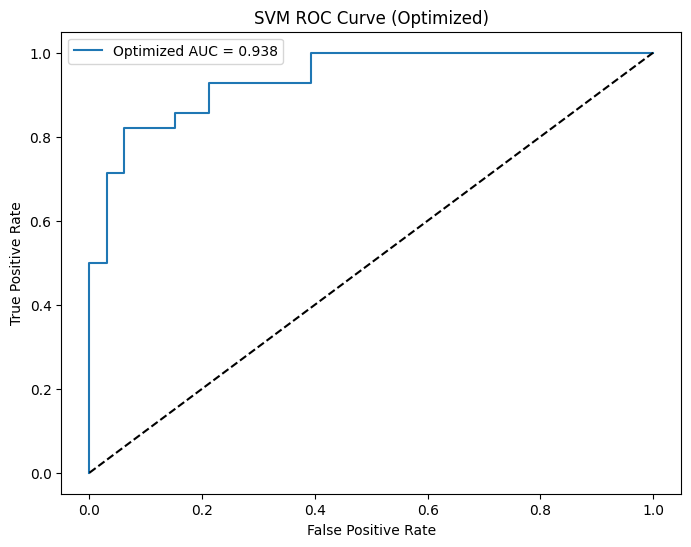

In [50]:
for col in ['cp_4', 'thal_7', 'exang']:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

svm = SVC(probability=True, random_state=42)

param_grid = {
    "C": [0.1, 1, 10],             
    "kernel": ["linear", "rbf"],  
    "gamma": ["scale", "auto"]    
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_

print("Best Parameters (GridSearch):", grid_search.best_params_)

y_pred = best_svm.predict(X_test)
y_prob = best_svm.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print("\n--- Original SVM (Default) ---")
print("Accuracy : 0.885")
print("Precision: 0.889")
print("Recall   : 0.857")
print("F1-score : 0.873")
print("AUC Score: 0.961")

print("\n--- SVM (Optimized) ---")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"AUC Score: {auc_score:.3f}")

fpr_opt, tpr_opt, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr_opt, tpr_opt, label=f"Optimized AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve (Optimized)")
plt.legend()
plt.show()

- RandomizedSearchCV for Support Vector Machine (SVM)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters (RandomizedSearch): {'kernel': 'linear', 'gamma': 'scale', 'degree': 4, 'C': 1}

--- Original SVM (Default) ---
Accuracy : 0.885
Precision: 0.889
Recall   : 0.857
F1-score : 0.873
AUC Score: 0.961

--- SVM (RandomizedSearch Optimized) ---
Accuracy : 0.836
Precision: 0.800
Recall   : 0.857
F1-score : 0.828
AUC Score: 0.938


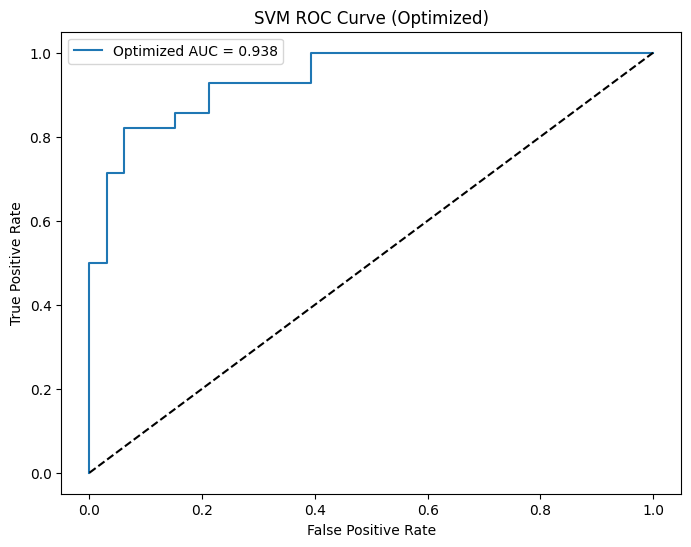

In [51]:
for col in ['cp_4', 'thal_7', 'exang']:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

svm = SVC(probability=True, random_state=42)

param_dist = {
    "C": [0.01, 0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "gamma": ["scale", "auto"],
    "degree": [2, 3, 4]
}

random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=20, scoring="accuracy", cv=5, n_jobs=-1, random_state=42, verbose=1)

random_search.fit(X_train, y_train)
best_svm = random_search.best_estimator_

print("Best Parameters (RandomizedSearch):", random_search.best_params_)

y_pred_opt = best_svm.predict(X_test)
y_prob_opt = best_svm.predict_proba(X_test)[:, 1]

acc_opt = accuracy_score(y_test, y_pred_opt)
prec_opt = precision_score(y_test, y_pred_opt)
rec_opt = recall_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)
auc_opt = roc_auc_score(y_test, y_prob_opt)

print("\n--- Original SVM (Default) ---")
print("Accuracy : 0.885")
print("Precision: 0.889")
print("Recall   : 0.857")
print("F1-score : 0.873")
print("AUC Score: 0.961")

print("\n--- SVM (RandomizedSearch Optimized) ---")
print(f"Accuracy : {acc_opt:.3f}")
print(f"Precision: {prec_opt:.3f}")
print(f"Recall   : {rec_opt:.3f}")
print(f"F1-score : {f1_opt:.3f}")
print(f"AUC Score: {auc_opt:.3f}")

fpr_opt, tpr_opt, _ = roc_curve(y_test, y_prob_opt)

plt.figure(figsize=(8,6))
plt.plot(fpr_opt, tpr_opt, label=f"Optimized AUC = {auc_opt:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve (Optimized)")
plt.legend()
plt.show()

4. Ensure reproducibility by saving model pipeline (preprocessing + model).

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 8, 'model__max_features': 'log2', 'model__max_depth': 50, 'model__criterion': 'log_loss'}

--- Random Forest (Optimized Pipeline) ---
Accuracy : 0.902
Precision: 0.893
Recall   : 0.893
F1-score : 0.893
AUC Score: 0.944


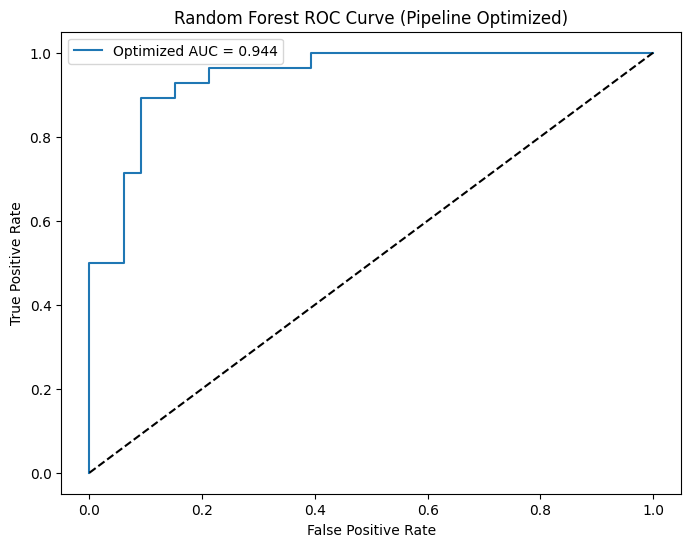

['../models/final_model.pkl']

In [52]:
df = pd.read_csv("../data/heart_disease.csv")

df["num"] = df["num"].apply(lambda x: 0 if x == 0 else 1)

X = df.drop("num", axis=1)
y = df["num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', FunctionTransformer(lambda x: pd.get_dummies(x, drop_first=True)))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', 'passthrough', [c for c in X.columns if c not in num_cols and c != 'num'])
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

param_dist = {
    "model__n_estimators": [100, 200, 300, 500],
    "model__criterion": ["gini", "entropy", "log_loss"],
    "model__max_depth": [None, 5, 10, 20, 30, 50],
    "model__min_samples_split": [2, 5, 10, 20],
    "model__min_samples_leaf": [1, 2, 4, 8],
    "model__max_features": [None, "sqrt", "log2"]
}

random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, n_iter=30, scoring="accuracy", cv=5, n_jobs=-1, random_state=42,verbose=1)

random_search.fit(X_train, y_train)
best_pipeline = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)

y_pred_opt = best_pipeline.predict(X_test)
y_prob_opt = best_pipeline.predict_proba(X_test)[:, 1]

print("\n--- Random Forest (Optimized Pipeline) ---")
print(f"Accuracy : {accuracy_score(y_test, y_pred_opt):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_opt):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred_opt):.3f}")
print(f"F1-score : {f1_score(y_test, y_pred_opt):.3f}")
print(f"AUC Score: {roc_auc_score(y_test, y_prob_opt):.3f}")

fpr_opt, tpr_opt, _ = roc_curve(y_test, y_prob_opt)
plt.figure(figsize=(8,6))
plt.plot(fpr_opt, tpr_opt, label=f"Optimized AUC = {roc_auc_score(y_test, y_prob_opt):.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve (Pipeline Optimized)")
plt.legend()
plt.show()

joblib.dump(best_pipeline, "../models/final_model.pkl")